<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Work Plan</b><br><br>

  Hi Michael, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). Thanks for submitting your work plan!<br><br>

  <b>Nice work on:</b><br>
  ✔️ Performing thorough <b>EDA</b> on the four datasets and merging them cleanly with consistent column names.<br>
  ✔️ Handling missing values thoughtfully (e.g., filling “No internet/phone service”) and converting columns like <b>total_charges</b>, <b>begin_date</b>, and <b>end_date</b> to the correct data types.<br>
  ✔️ Creating useful new features such as <b>tenure_days</b> and <b>tenure_months</b>, and clearly visualizing churn patterns with respect to tenure, monthly spend, contract type, and payment method.<br>
  ✔️ Asking insightful <b>clarifying questions</b> that show strong business awareness (e.g., customer trial cases, meaning of “No” in end_date, contract/payment type changes).<br><br>

  <b>Work plan:</b><br>
  Your roadmap is solid and covers encoding, scaling, splitting, modeling, and evaluation with AUC-ROC.<br>
  ⚠️ Alongside <b>Logistic Regression</b>, it’s good you’re planning to test <b>Random Forest</b>, <b>Gradient Boosting</b>, <b>XGBoost</b>, <b>LightGBM</b>, and <b>CatBoost</b>. You could also include a <b>Decision Tree</b> as a simple benchmark.<br>
  ⚠️ For a baseline, make sure to include a <b>DummyClassifier</b> so you can compare your models against a naive reference.<br>
  ⚠️ Since you already noticed the <b>class imbalance</b>, remember to address it with <b>class_weight</b> (e.g., <code>class_weight='balanced'</code> or <code>scale_pos_weight</code> in boosting models) or simple <b>upsampling</b> of the minority class, always applied only to the training data.<br><br>

  <b>Clarifying questions:</b><br>
     1) <b>"No" in end_date</b>: this indeed means the customer is still active, not missing data — you handled this correctly by treating it as <code>NaT</code> and creating a churn flag.<br>
     2) <b>Short-tenure customers</b>: include them, but be mindful — they might look like noise. You can test models with and without them to see if performance changes.<br>
     3) <b>Missing internet service</b>: these are customers who did not subscribe to internet. Your approach of labeling them “No internet service” is correct.<br>
     4) <b>Contract/payment changes</b>: the dataset reflects the <b>current status as of Feb 1, 2020</b>. You don’t need to track history here, just use the current values.<br>
     5) <b>Special cases in charges</b>: promotions/refunds aren’t flagged in this dataset, so treat the values as given. Outliers can be detected with boxplots but they’re still valid signals.<br>
     6) <b>Project goal</b>: focus on predicting whether a customer will churn at all, not only short-term churn — that’s the task defined by the rubric.<br>
     7) <b>False positives vs. catching churn</b>: since churn costs are asymmetric, it’s usually better to <b>catch more churners (higher recall)</b>, even if false positives increase. But AUC-ROC is the main metric you’ll be evaluated on here.<br><br>

  Overall, you’ve built a strong foundation with your EDA, feature engineering, and thoughtful analysis. <b>You are all set to continue with the solution code — good luck!</b> 🚀💪
</div>


# Work Plan for Final Project

In this notebook, I'll be setting up a plan of the work I'll be performing to help Interconnect forecast churn rate of their clients. I'll be peforming EDA on the provided datasets that will help me understand the right approach to take in building a model to predict churn. Once that is complete I'll move on to creating a series of models for comparison and final testing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [6]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [7]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Doesn't look like we have any missing data points in these 4 csv's which is always a good start. I'll rename the columns to snake case for clarity and consistency across all our columns before merging them together into a one larger df.

In [8]:
contract_df = contract_df.rename(columns = {'customerID':'customer_id', 'BeginDate':'begin_date', 'EndDate':'end_date',
                                            'Type':'type', 'PaperlessBilling':'paperless_billing', 'PaymentMethod':'payment_method',
                                           'MonthlyCharges':'monthly_charges', 'TotalCharges':'total_charges'})
personal_df = personal_df.rename(columns = {'customerID':'customer_id', 'SeniorCitizen':'senior_citizen', 'Partner':'partner',
                                           'Dependents':'dependents'})
internet_df = internet_df.rename(columns = {'customerID':'customer_id', 'InternetService':'internet_service', 
                                            'OnlineSecurity':'online_security', 'OnlineBackup':'online_backup',
                                           'DeviceProtection':'device_protection', 'TechSupport':'tech_support',
                                           'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies'})
phone_df = phone_df.rename(columns = {'customerID':'customer_id', 'MultipleLines':'multiple_lines'})


In [9]:
merge1 = contract_df.merge(personal_df, on = 'customer_id', how = 'left')
merge2 = internet_df.merge(phone_df, on = 'customer_id', how = 'left')
df = merge1.merge(merge2, on = 'customer_id', how = 'left')
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  tech_support       5517 

In [11]:
internet_columns = ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
                   'streaming_movies']
df[internet_columns] = df[internet_columns].fillna('No internet service')

df['multiple_lines'] = df['multiple_lines'].fillna('No phone service')

df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No phone service
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No phone service
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

I chose to handle missing data by filling in NaN values related to the columns from the Internet df and the Phone df with "No internet/phone service" based on the assumption that those values were missing due to the client not having had either one of those services during their duration with Interconnect. Now our merged df has no missing values and down the line can use them as categories to improve overall performance and predictions.

In [13]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors = 'coerce')
df['total_charges'] = df['total_charges'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   float64
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

In [14]:
#df.query("total_charges == 0")

I filled in the total_charges column empty values with 0's after converting the column to numeric. Running the line above showed 11 customers who's begin_date was the last day our data was recorded (2020-02-01), and they had only received one monthly_charge, not a total_charge yet.

In [15]:
df['begin_date'] = pd.to_datetime(df['begin_date'])
df['end_date'] = pd.to_datetime(df['end_date'].replace("No", pd.NaT))
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No phone service
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No phone service
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [16]:
df['partner'] = df['partner'].replace('Yes', 1)
df['partner'] = df['partner'].replace('No', 0)
df['paperless_billing'] = df['paperless_billing'].replace('Yes', 1)
df['paperless_billing'] = df['paperless_billing'].replace('No', 0)
df['dependents'] = df['dependents'].replace('Yes', 1)
df['dependents'] = df['dependents'].replace('No', 0)
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,Female,0,1,0,DSL,No,Yes,No,No,No,No,No phone service
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,Male,0,0,0,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,Male,0,0,0,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,Male,0,0,0,DSL,Yes,No,Yes,Yes,No,No,No phone service
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,Female,0,0,0,Fiber optic,No,No,No,No,No,No,No


In [17]:
df.describe()

,paperless_billing,monthly_charges,total_charges,senior_citizen,partner,dependents
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.592219,64.761692,2279.734304,0.162147,0.483033,0.299588
std,0.491457,30.090047,2266.794470,0.368612,0.499748,0.458110
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000
50%,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000
75%,1.000000,89.850000,3786.600000,0.000000,1.000000,1.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000


Looking at the numerical columns in the df shows no unrealistic values. We already know the min value of 0 in total_charges makes sense as those customers just joined before we started analyzing the dataset.

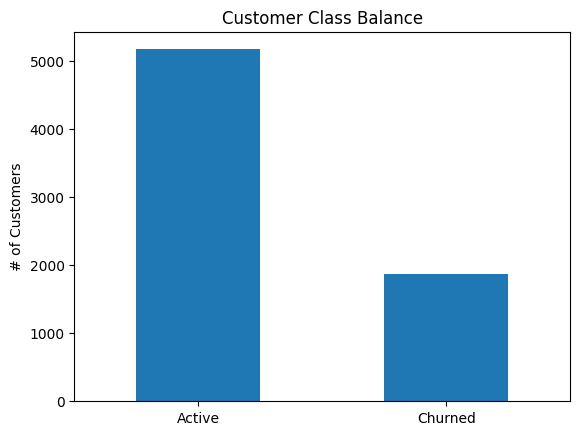

In [18]:
class_counts = df['end_date'].notna().value_counts()
class_counts.plot(kind = 'bar')
plt.title('Customer Class Balance')
plt.xticks([0, 1], ['Active', 'Churned'], rotation = 0)
plt.ylabel('# of Customers')
plt.show()

Above we can see there is a very dramatic imbalance in classes. Luckily for Interconnect, a much larger portion of this dataset is an active customer. If left as is, our model would be trained on the imbalanced data which could impact our accuracy metrics down the line, so we should probably resample our data before training any machine learning models on it.

In [19]:
cutoff_date = pd.to_datetime("2020-02-01")
df['tenure_days'] = (df['end_date'].fillna(cutoff_date) - df['begin_date']).dt.days
df['tenure_months'] = df['tenure_days'] // 30
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,tenure_days,tenure_months
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,Female,0,...,DSL,No,Yes,No,No,No,No,No phone service,31,1
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,1036,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,61,2
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No phone service,1371,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,Female,0,...,Fiber optic,No,No,No,No,No,No,No,61,2


Adding both the amount of days and amount of months a customer has been with Interconnect will help the model with another numerical feature to anaylze down the line.

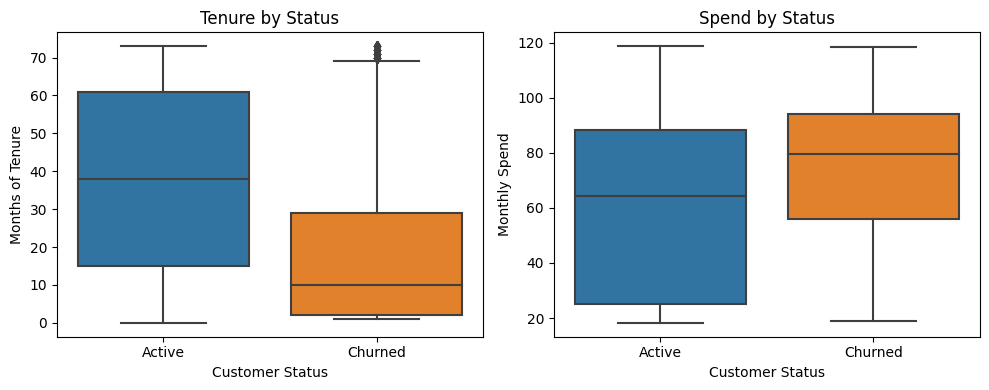

In [20]:
df['churn'] = df['end_date'].notna().astype(int)

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'churn',
           y = 'tenure_months',
           data = df,
           ax = axes[0]
           )
axes[0].set_title('Tenure by Status')
axes[0].set_xlabel('Customer Status')
axes[0].set_ylabel('Months of Tenure')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Active', 'Churned'])
sns.boxplot(x = 'churn',
           y = 'monthly_charges',
           data = df,
           ax = axes[1])
axes[1].set_title('Spend by Status')
axes[1].set_xlabel('Customer Status')
axes[1].set_ylabel('Monthly Spend')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Active', 'Churned'])
plt.tight_layout()
plt.show()

In [21]:
display(df.groupby('churn')['tenure_months'].describe(), df.groupby('churn')['monthly_charges'].describe())

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,37.757441,24.368088,0.0,15.0,38.0,61.0,73.0
1,1869.0,18.004280,19.597065,1.0,2.0,10.0,29.0,73.0


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


The box plots above compare both tenure and monthly spend for active vs churned customers. On the left, our active customers are spending many more months with the company, while customers who leave are typically not paying for the service for very long, on average of 37.8 months vs 18 months of tenure. As far as spend goes, the inverse is true, where customers who are paying less are staying active, while those customers who are spending more per month are more likely to have already left and found a less expensive or more cost-effective option elsewhere, on average 61.3 vs 74.4 per month.

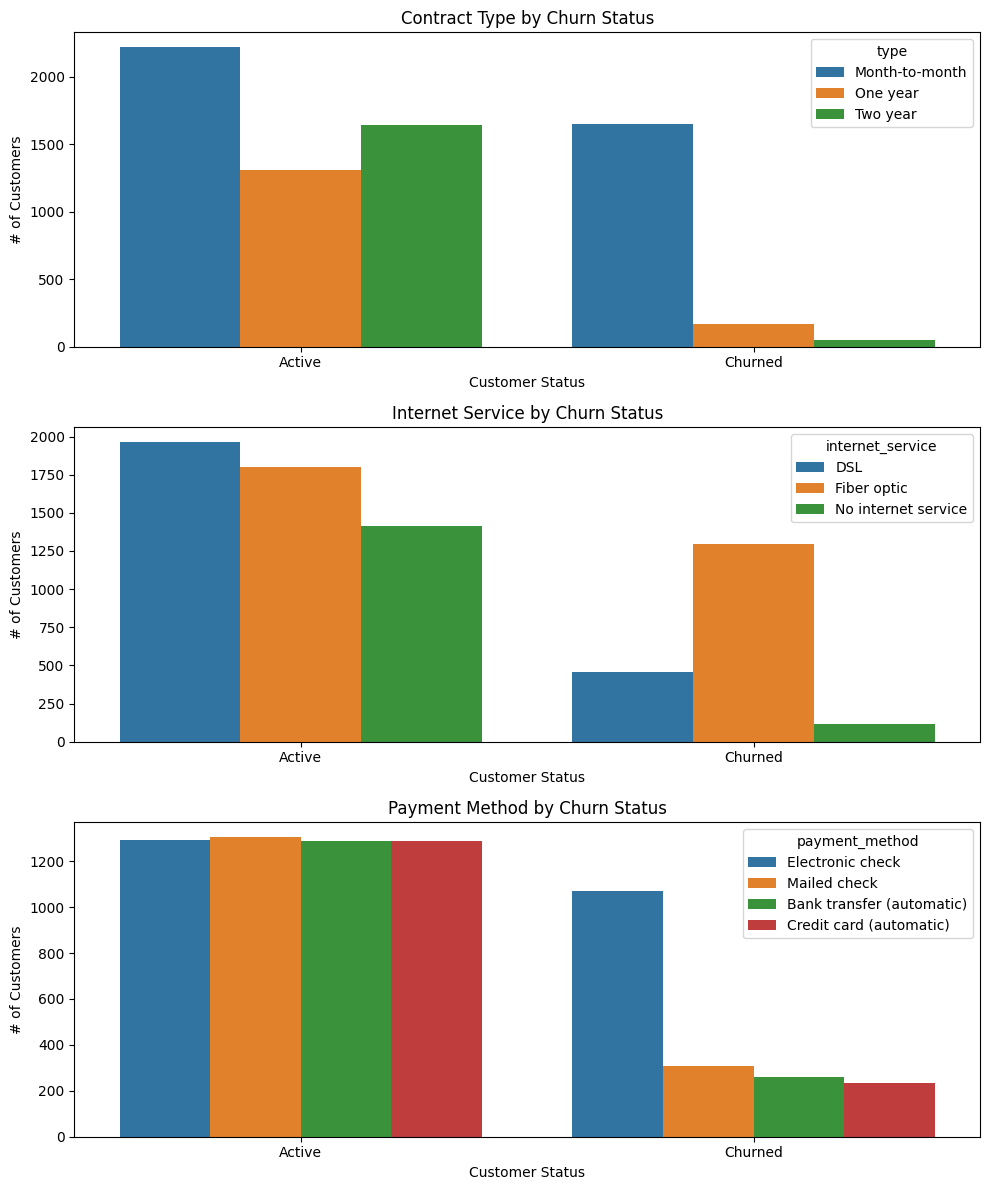

In [22]:
fig, axes = plt.subplots(3, 1, figsize = (10, 12))
sns.countplot(x = 'churn',
           hue = 'type',
           data = df,
           ax = axes[0]
           )
axes[0].set_title('Contract Type by Churn Status')
axes[0].set_xlabel('Customer Status')
axes[0].set_ylabel('# of Customers')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Active', 'Churned'])
sns.countplot(x = 'churn',
              hue = 'internet_service',
              data = df,
              ax = axes[1])
axes[1].set_title('Internet Service by Churn Status')
axes[1].set_xlabel('Customer Status')
axes[1].set_ylabel('# of Customers')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Active', 'Churned'])
sns.countplot(x = 'churn',
             hue = 'payment_method',
             data = df,
             ax = axes[2])
axes[2].set_title('Payment Method by Churn Status')
axes[2].set_xlabel('Customer Status')
axes[2].set_ylabel('# of Customers')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Active', 'Churned'])
plt.tight_layout()
plt.show()

In the plots above, I compared the categorical columns of interest based on customer status. The first plot takes a look at contract type, where we see a vast majority of our churned customers are on a month-to-month basis, which makes sense as those would be easier to cancel should they want to. The internet service comparison shows that the majority of churned customers had fiber optic internet, which, while interesting that the pattern turned out that way, may not lead to much insight as we don't have the internet speeds or cost to train our model with. These are two large factors in choosing an internet plan, and adding them to our dataset could further improve how internet plans affect churn rate as well. The final graph shows payment method comparisons, and I had a feeling it would look similar to this. The two methods that take actual effort (electronic and mailed check) have the highest amount of churned customers, while those on autopay, either through their bank or credit card, may have noticed they still paid for the service after months of meaning to cancel or forgetting they still had it altogether and continue to pay for it.

## Clarifying Questions

Based on the EDA performed above, there are a few questions I'd need clarified before I can begin training my models

1. I assumed the "No" in the end_date column means the customer is active, but could it also be a missing data point that someone previously filled in?
2. Should we include customers with shorter tenure in our analysis? If we offer some kind of trial service would their inclusion make a difference to the model's training/performance?
3. Similar to question 1, did the missing internet service customers mean they don't pay for the service, never activated the service, or are just missing from the dataset?
4. How do customers that changed from one payment type or contract type to another appear in the dataset now? Should we consider them as their initial type or current type?
5. Would there be any special cases in either of the charge columns that could indicate a customer received a refund, was taking part in a promotion, or there was an error on their bill?
6. Is the overall goal of the project to predict churn of all customers or customers who are more likely to churn in the short-term future?
7. Should we be focused on catching all positive cases or trying to reduce the amount of false positives the model predcits?

## Rough Plan to Solve this Task

Since I've already cleaned and performed EDA on our data, there are now just a few more steps to complete this task:

1. Feature Engineering/Encoding - I already started a few of these, but I'll want to create some more features and encode them through OHE and Ordinal Encoding as needed for model training
2. Scale and Split the Data - StandardScaler may be a good fit for this project for our numerical features so that they are standardized across all features. I'll then split into train, test, and validation datasets for training our models.
3. Create the Baseline and Compare Models - I'll create a Logistic Regression model as a baseline, then use models such as Random Forest, Gradient Boosted, XGBoost, LightGBM, and CatBoost for comparison to our dummy model, tuning hyperparameters along the way to improve performance, analyzing each one with ROC-AUC scoring and cross-validation.
4. Select the Best Model and Test - Use our split off test dataset with the best performing model and analyze it's resulting accuracy and ROC-AUC scores to ensure we meet the requirements for the task.
5. Conclusion - Write a detailed wrap-up of the project and results, pulling examples from each step's conclusion along the way for a final result to provide insights that the business can use to help predict customer churn.